# Calcolo del beta

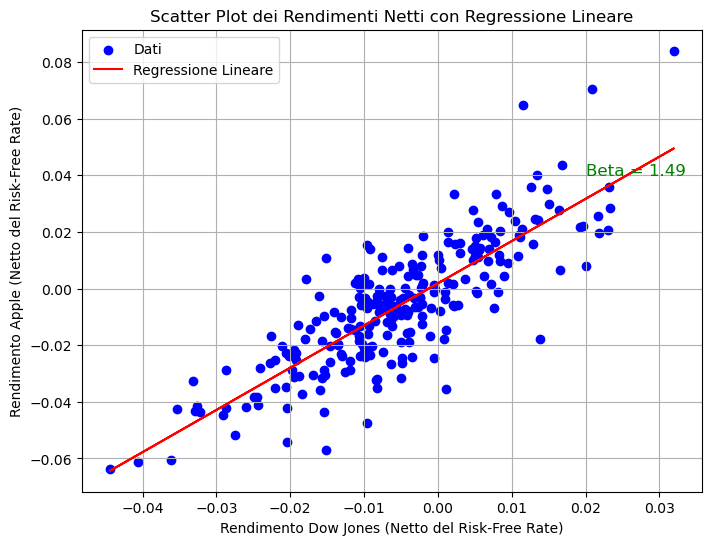

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats

# Scarica i dati per il Dow Jones e Apple
dow_jones = yf.download('^DJI', start='2022-01-01', end='2022-12-31', progress=False)
apple = yf.download('AAPL', start='2022-01-01', end='2022-12-31', progress=False)

# Calcola i rendimenti giornalieri
dow_jones['Rendimento'] = dow_jones['Adj Close'].pct_change()
apple['Rendimento'] = apple['Adj Close'].pct_change()

# Calcola i rendimenti netti del risk-free rate (0.5%)
risk_free_rate = 0.005
dow_jones['Rendimento Netto'] = dow_jones['Rendimento'] - risk_free_rate
apple['Rendimento Netto'] = apple['Rendimento'] - risk_free_rate

# Rimuovi la prima riga che avrà un NaN a causa del calcolo del rendimento percentuale
dow_jones = dow_jones.dropna()
apple = apple.dropna()

# Calcola la regressione lineare
slope, intercept, r_value, p_value, std_err = stats.linregress(dow_jones['Rendimento Netto'], apple['Rendimento Netto'])

# Calcola il beta come il coefficiente della regressione
beta = slope

# Crea lo scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dow_jones['Rendimento Netto'], apple['Rendimento Netto'], color='blue', label='Dati')
plt.plot(dow_jones['Rendimento Netto'], intercept + slope*dow_jones['Rendimento Netto'], color='red', label='Regressione Lineare')
plt.xlabel('Rendimento Dow Jones (Netto del Risk-Free Rate)')
plt.ylabel('Rendimento Apple (Netto del Risk-Free Rate)')
plt.title('Scatter Plot dei Rendimenti Netti con Regressione Lineare')
plt.grid(True)

# Mostra il beta
plt.text(0.02, 0.04, f'Beta = {beta:.2f}', fontsize=12, color='green')

plt.legend()
plt.show()